# Ethereum Data Example

In [76]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from ethereum import EthereumData
from tqdm import tqdm
from numpy import intersect1d
from datetime import datetime

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load data from local directory

In [3]:
example_dt = "2021-09-01"

eth_data = EthereumData(
    start_date=example_dt, end_date=example_dt, save_path=f"data/{example_dt}"
)

In [4]:
# takes a second
eth_data.load()

Loading blocks...
Loading transactions...
Loading contracts...
Loading logs...
Loading receipts...
Loading token_transfers...
Loading tokens...


In [318]:
eth_data.logs.head()

,log_index,transaction_hash,transaction_index,block_hash,block_number,address,data,topics
0,171,0xb73ba89e2711f11fa62132c2eebdc828e853700f04f8...,200,0x8626b9f635910cf8b4a1b6a2567fee4a4b0aa30d8e3b...,13136829,0xea610b1153477720748dc13ed378003941d84fab,0x00000000000000000000000000000000000000000000...,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...
1,172,0xb73ba89e2711f11fa62132c2eebdc828e853700f04f8...,200,0x8626b9f635910cf8b4a1b6a2567fee4a4b0aa30d8e3b...,13136829,0x3b9665d11f4284d77d7833a1efd4c0f8480ece9b,0x00000000000000000000000000000000000000000000...,0xb114698a397e5f7a7c78e5e58f6f59d2c329c988c585...
2,173,0x2343b30f3cde30c238c878388cd9ae7c30dd4ff8414b...,201,0x8626b9f635910cf8b4a1b6a2567fee4a4b0aa30d8e3b...,13136829,0x3b1bb53b1a42ff61b7399fc196469a742cd3e98d,0x,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...
3,174,0xbe30c74511d39b8a93ce0df8591709d2873f3a5ce218...,203,0x8626b9f635910cf8b4a1b6a2567fee4a4b0aa30d8e3b...,13136829,0xff9c1b15b16263c61d017ee9f65c50e4ae0113d7,0x00000000000000000000000000000000000000000000...,0x17307eab39ab6107e8899845ad3d59bd9653f200f220...
4,175,0x0f014a9efbd8a5638f6797da9caca072c7303e8b4e3b...,205,0x8626b9f635910cf8b4a1b6a2567fee4a4b0aa30d8e3b...,13136829,0x3b1bb53b1a42ff61b7399fc196469a742cd3e98d,0x,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...


In [321]:
eth_data.tokens.columns

Index(['address', 'symbol', 'name', 'decimals', 'total_supply',
       'block_number'],
      dtype='object')

In [24]:
x = eth_data.transactions[eth_data.transactions['hash'] == hash_]['input'].values[0]

In [34]:
eth_data.logs[eth_data.logs['transaction_hash'] == hash_]

,log_index,transaction_hash,transaction_index,block_hash,block_number,address,data,topics
4327,103,0x22d2b850a8b1b2c5752c84b493ef6b41d32edd55f70d...,105,0x0d60e2de79ddc7b28b022634e7db297b5f71c5207489...,13136845,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x00000000000000000000000000000000000000000000...,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...
4328,104,0x22d2b850a8b1b2c5752c84b493ef6b41d32edd55f70d...,105,0x0d60e2de79ddc7b28b022634e7db297b5f71c5207489...,13136845,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x00000000000000000000000000000000000000000000...,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...
4329,105,0x22d2b850a8b1b2c5752c84b493ef6b41d32edd55f70d...,105,0x0d60e2de79ddc7b28b022634e7db297b5f71c5207489...,13136845,0xdac17f958d2ee523a2206206994597c13d831ec7,0x00000000000000000000000000000000000000000000...,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...
4330,106,0x22d2b850a8b1b2c5752c84b493ef6b41d32edd55f70d...,105,0x0d60e2de79ddc7b28b022634e7db297b5f71c5207489...,13136845,0xdac17f958d2ee523a2206206994597c13d831ec7,0x00000000000000000000000000000000000000000000...,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...
4331,107,0x22d2b850a8b1b2c5752c84b493ef6b41d32edd55f70d...,105,0x0d60e2de79ddc7b28b022634e7db297b5f71c5207489...,13136845,0xc549a5c701cb6e6cbc091007a80c089c49595468,0x00000000000000000000000000000000000000000000...,0x06dfeb25e76d44e08965b639a9d9307df8e1c3dbe2a6...
4332,108,0x22d2b850a8b1b2c5752c84b493ef6b41d32edd55f70d...,105,0x0d60e2de79ddc7b28b022634e7db297b5f71c5207489...,13136845,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x00000000000000000000000000000000000000000000...,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...
4333,109,0x22d2b850a8b1b2c5752c84b493ef6b41d32edd55f70d...,105,0x0d60e2de79ddc7b28b022634e7db297b5f71c5207489...,13136845,0xdac17f958d2ee523a2206206994597c13d831ec7,0x00000000000000000000000000000000000000000000...,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...
4334,110,0x22d2b850a8b1b2c5752c84b493ef6b41d32edd55f70d...,105,0x0d60e2de79ddc7b28b022634e7db297b5f71c5207489...,13136845,0x881d40237659c251811cec9c364ef91dc08d300c,0x,0xbeee1e6e7fe307ddcf84b0a16137a4430ad5e2480fc4...


In [18]:
eth_data.token_transfers.loc[2000, ]

token_address              0xdac17f958d2ee523a2206206994597c13d831ec7
from_address               0xb3c839dbde6b96d37c56ee4f9dad3390d49310aa
to_address                 0x7296333e1615721f4bd9df1a3070537484a50cf8
value                                                         4554877
transaction_hash    0x22d2b850a8b1b2c5752c84b493ef6b41d32edd55f70d...
log_index                                                         106
block_number                                                 13136845
Name: 2000, dtype: object

In [16]:
hash_ = eth_data.token_transfers.loc[2000, 'transaction_hash']

In [44]:
merged_with_receipts = pd.merge(
    left=eth_data.transactions, 
    right=eth_data.receipts, 
    left_on=[
        'hash', 
        'transaction_index', 
        'block_hash', 
        'block_number'
    ],
    right_on=[
        'transaction_hash', 
        'transaction_index', 
        'block_hash', 
        'block_number'
    ]
)

In [ ]:
merged_with_transfers = pd.merge(
    merged_with_receipts[['hash']], 
    eth_data.token_transfers, 
    how='left',
    left_on='hash',
    right_on='transaction_hash',
    suffixes=("", "_transfer")
)

In [331]:
pd.merge(
    eth_data.transactions[['hash', 'from_address']],
    eth_data.contracts,
    how='left', 
    left_on='from_address',
    right_on='address',
    suffixes=('', '_contracts')
)[['hash', 'from_address', 'bytecode', 'function_sighashes', 'is_erc20', 'is_erc721']].head()

,hash,from_address,bytecode,function_sighashes,is_erc20,is_erc721
0,0x0c7e291fbd6c6094c53e81b116cca1a5a0ad199c10aa...,0x5629eb360b54e146323f8aa34546796029bd78f6,NaN,NaN,NaN,NaN
1,0x2567f447d63b76de7fb59e6a36af0614f3cdd6fc1e68...,0x1938a448d105d26c40a52a1bfe99b8ca7a745ad0,NaN,NaN,NaN,NaN
2,0x03e5375d7ea8ea68d3c18dec32d75099a287cc232b42...,0xbccec45297ec2877ba96ae86b2fe59f95a0522e6,NaN,NaN,NaN,NaN
3,0x8a15f43c852136141e3417684284df785104adefa739...,0x4ad64983349c49defe8d7a4686202d24b25d0ce8,NaN,NaN,NaN,NaN
4,0x20126b157dc61a5ef2af7528b4e51aca6ee79ce983e1...,0xb6d0a541e1e94a037a2b3d5e998c1272227c7b92,NaN,NaN,NaN,NaN


In [52]:
token_hashes = list(eth_data.token_transfers['transaction_hash'].values)
merged_with_receipts['is_transfer'] = merged_with_receipts['hash'].isin(token_hashes)
#merged_transactions['is_contract_creation'] = ~merged_transactions['contract_address'].isna()

In [327]:
len(eth_data.contracts['address'].unique())#['block_number'].dropna()

997

In [515]:
df#.columns#[df['function_sighashes'].isna()]

,hash,to_address,bytecode,function_sighashes,is_erc20,is_erc721
0,0x0c7e291fbd6c6094c53e81b116cca1a5a0ad199c10aa...,0x0944d5848bd9f60a34ba92aea300d4286696eb76,NaN,NaN,NaN,NaN
1,0x2567f447d63b76de7fb59e6a36af0614f3cdd6fc1e68...,0xbb0e17ef65f82ab018d8edd776e8dd940327b28b,NaN,NaN,NaN,NaN
2,0x03e5375d7ea8ea68d3c18dec32d75099a287cc232b42...,0xe000af30955d5d1f539d6ab4dfc2df499cb4f5f7,NaN,NaN,NaN,NaN
3,0x8a15f43c852136141e3417684284df785104adefa739...,0xe7703b16ef7cd803ff46703172ef402f07a0ebb2,NaN,NaN,NaN,NaN
4,0x20126b157dc61a5ef2af7528b4e51aca6ee79ce983e1...,0x4ad64983349c49defe8d7a4686202d24b25d0ce8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1225099,0xcda96b118bfd79387a111608f32949d7c42780f18244...,0x4c46ff32fcf1fcd25bae2e26ed5fd3a682412ffc,NaN,NaN,NaN,NaN
1225100,0xf8f0e8e45d85017db4d0a6e43fa4bd625b9701a709ea...,0xf1d113059517dbddd99ab9caffa76fc01f0557cd,NaN,NaN,NaN,NaN
1225101,0x9bd9e5731408131fbb5cb30b8bf06a08b4921a5268a0...,0xa0c68c638235ee32657e8f720a23cec1bfc77c77,NaN,NaN,NaN,NaN
1225102,0xfafa9664c01697e4fbd9ba7c1391f5f6761be5e78d2b...,0x35bdc5152c9d747cd6788e32f47b76c3bf41599a,NaN,NaN,NaN,NaN


In [491]:
eth_data.token_transfers.query(f"to_address == '{nft}'")

,token_address,from_address,to_address,value,transaction_hash,log_index,block_number


In [482]:
nft

'0xa86ef1837e57d64aee21e9777346a3df861bf85c'

In [436]:
merged_transactions.head().transpose()

,0,1,2,3,4
hash,0x0c7e291fbd6c6094c53e81b116cca1a5a0ad199c10aa...,0x2567f447d63b76de7fb59e6a36af0614f3cdd6fc1e68...,0x03e5375d7ea8ea68d3c18dec32d75099a287cc232b42...,0x8a15f43c852136141e3417684284df785104adefa739...,0x20126b157dc61a5ef2af7528b4e51aca6ee79ce983e1...
nonce,783,832716,7304,199407,0
block_hash,0x71fecf94580b6bdc8184f6799a0506d80d4c0f2df75e...,0x71fecf94580b6bdc8184f6799a0506d80d4c0f2df75e...,0x71fecf94580b6bdc8184f6799a0506d80d4c0f2df75e...,0x71fecf94580b6bdc8184f6799a0506d80d4c0f2df75e...,0x71fecf94580b6bdc8184f6799a0506d80d4c0f2df75e...
block_number_trasaction,13136827,13136827,13136827,13136827,13136827
transaction_index,0,1,2,3,4
from_address_trasaction,0x5629eb360b54e146323f8aa34546796029bd78f6,0x1938a448d105d26c40a52a1bfe99b8ca7a745ad0,0xbccec45297ec2877ba96ae86b2fe59f95a0522e6,0x4ad64983349c49defe8d7a4686202d24b25d0ce8,0xb6d0a541e1e94a037a2b3d5e998c1272227c7b92
to_address_trasaction,0x0944d5848bd9f60a34ba92aea300d4286696eb76,0xbb0e17ef65f82ab018d8edd776e8dd940327b28b,0xe000af30955d5d1f539d6ab4dfc2df499cb4f5f7,0xe7703b16ef7cd803ff46703172ef402f07a0ebb2,0x4ad64983349c49defe8d7a4686202d24b25d0ce8
value_trasaction,0,0,189465600000000000,51996000000000000,249587000000000000
gas,70000,200000,50000,60000,21000
gas_price,207438875866,193619607297,163423700000,139162548391,138000000000


In [419]:
t_hash = eth_data.token_transfers['transaction_hash'][1000]

In [422]:
str(t_hash)

'0x0055c0dcdfba79b95f99e5a556f5c5d23834590a8a4a856c6e1774e573d71adb'

In [433]:
eth_data.logs[eth_data.logs['transaction_hash'] == t_hash]

,log_index,transaction_hash,transaction_index,block_hash,block_number,address,data,topics
542906,86,0x0055c0dcdfba79b95f99e5a556f5c5d23834590a8a4a...,84,0xb18741796548eb2338052846a293b3581abdbd7f9996...,13138271,0x9b9647431632af44be02ddd22477ed94d14aacaa,0x00000000000000000000000000000000000000000000...,0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4...


In [430]:
eth_data.transactions[(eth_data.transactions['hash'] == t_hash)]

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type
386690,0x0055c0dcdfba79b95f99e5a556f5c5d23834590a8a4a...,221905,0xb18741796548eb2338052846a293b3581abdbd7f9996...,13138271,84,0x179288a02ee8a939668ddbb0ac21b4fc2a9606a7,0x9b9647431632af44be02ddd22477ed94d14aacaa,0,80000,106000000000,0xa9059cbb000000000000000000000000ae0d526150c8...,1630478994,NaN,NaN,0


In [334]:
merged_transactions.groupby([
    'transaction_type', 'is_contract_creation', 'is_transfer'
]).count().transpose()

transaction_type               0                         1             2  \
is_contract_creation       False         True        False         False   
is_transfer                False   True  False True  False True    False   
hash                      323208  270769   777     5    17   181  381277   
nonce                     323208  270769   777     5    17   181  381277   
block_hash                323208  270769   777     5    17   181  381277   
block_number              323208  270769   777     5    17   181  381277   
transaction_index         323208  270769   777     5    17   181  381277   
from_address              323208  270769   777     5    17   181  381277   
to_address                323208  270769     0     0    17   181  381277   
value                     323208  270769   777     5    17   181  381277   
gas                       323208  270769   777     5    17   181  381277   
gas_price                 323208  270769   777     5    17   181  381277   
input                     323208  270769   777     5    17   181  381277   
block_timestamp           323208  270769   777     5    17   181  381277   
max_fee_per_gas                0       0     0     0     0     0  381277   
max_priority_fee_per_gas       0       0     0     0     0     0  381277   
transaction_hash          323208  270769   777     5    17   181  381277   
cumulative_gas_used       323208  270769   777     5    17   181  381277   
gas_used                  323208  270769   777     5    17   181  381277   
contract_address               0       0   777     5     0     0       0   
root                           0       0     0     0     0     0       0   
status                    323208  270769   777     5    17   181  381277   
effective_gas_price       323208  270769   777     5    17   181  381277   

transaction_type                              
is_contract_creation             True         
is_transfer                True  False True   
hash                      248655   183    32  
nonce                     248655   183    32  
block_hash                248655   183    32  
block_number              248655   183    32  
transaction_index         248655   183    32  
from_address              248655   183    32  
to_address                248655     0     0  
value                     248655   183    32  
gas                       248655   183    32  
gas_price                 248655   183    32  
input                     248655   183    32  
block_timestamp           248655   183    32  
max_fee_per_gas           248655   183    32  
max_priority_fee_per_gas  248655   183    32  
transaction_hash          248655   183    32  
cumulative_gas_used       248655   183    32  
gas_used                  248655   183    32  
contract_address               0   183    32  
root                           0     0     0  
status                    248655   183    32  
effective_gas_price       248655   183    32

### Single Block

In [304]:
block_index = 5451 #5452
block_number = eth_data.blocks.loc[block_index, 'number']
block_hash = eth_data.blocks.loc[block_index, 'hash']

In [305]:
block_transactions = merged_with_receipts.query(
    f"block_hash == '{block_hash}'"
).set_index('transaction_index')
block_transactions.shape[0]

569

In [201]:
# numeric_cols = list(block_transactions.columns[block_transactions.dtypes == 'int64'])
# grouper = block_transactions[numeric_cols].groupby(['status'])
# df = pd.DataFrame({
#     "Min of Incomplete" : grouper.min().loc[0],
#     "Max of Incomplete" : grouper.max().loc[0],
#     "Min of Complete" : grouper.min().loc[1],
#     "Max of Complete" : grouper.max().loc[1],
# })
# df

In [124]:
#block_transactions['max_priority_fee_per_gas']

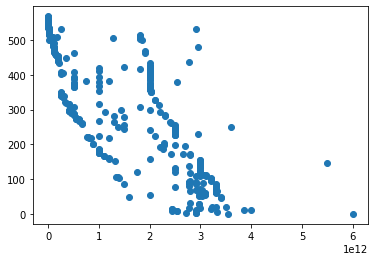

In [306]:
plt.scatter(
    block_transactions['max_priority_fee_per_gas'],
    block_transactions.index
)

In [307]:
grouper = block_transactions.groupby(['is_transfer'])
grouper.mean()

,nonce,block_number,gas,gas_price,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,cumulative_gas_used,gas_used,root,status,effective_gas_price
is_transfer,,,,,,,,,,,,,
False,2645.138544,13142178.0,1.235581e+06,2.520928e+12,1.630532e+09,3.000525e+12,1.408576e+12,1.392540,7.838557e+06,27157.968028,NaN,0.138544,2.520928e+12
True,46773.666667,13142178.0,1.302187e+05,2.399423e+12,1.630532e+09,2.515885e+12,2.237897e+12,1.333333,1.114814e+07,91483.166667,NaN,1.000000,2.399423e+12


In [171]:
# grouper = block_transactions.groupby(['is_contract_creation'])
# grouper.mean()

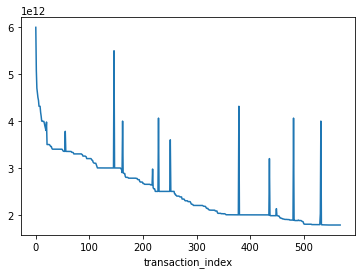

In [308]:
block_transactions['gas_price'].plot()

In [248]:
hash_ = block_transactions.loc[146, 'hash']
eth_data.logs.query(f"transaction_hash == 'hash'")

,log_index,transaction_hash,transaction_index,block_hash,block_number,address,data,topics


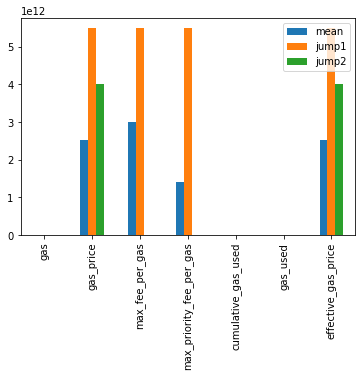

In [249]:
pd.DataFrame({
    "mean" : block_transactions.mean(),
    "jump1" : block_transactions.loc[[146]].mean(),
    "jump2" : block_transactions.loc[[162]].mean()
}).transpose().filter(like="gas").transpose().plot.bar()

In [251]:
block_transactions[160:170]

,hash,nonce,block_hash,block_number,from_address,to_address,value,gas,gas_price,input,...,max_priority_fee_per_gas,transaction_type,transaction_hash,cumulative_gas_used,gas_used,contract_address,root,status,effective_gas_price,is_transfer
transaction_index,,,,,,,,,,,,,,,,,,,,,
160,0x382946aefb89249a93cf4f3ffb8000f372a512605ebd...,1287,0x04c30e47689e808e1fef3a37d8815fb92ae99248450c...,13142178,0x6ab615cf8decfc488186e54066fc10589c9293a3,0x34b4df75a17f8b3a6eff6bba477d39d701f5e92c,1000000000000000000,1806058,2977081630357,0xa185ae95000000000000000000000000000000000000...,...,1.194970e+12,2,0x382946aefb89249a93cf4f3ffb8000f372a512605ebd...,4200185,26042,NaN,NaN,0,2977081630357,False
161,0x1be7352f7996334eda3c49c40d8b362c98ad2cd6f5ad...,223,0x04c30e47689e808e1fef3a37d8815fb92ae99248450c...,13142178,0x52149d18039b037374e2aed5211cd649c6f39d1c,0x34b4df75a17f8b3a6eff6bba477d39d701f5e92c,800000000000000000,1460787,2900000000000,0xa185ae95000000000000000000000000000000000000...,...,NaN,0,0x1be7352f7996334eda3c49c40d8b362c98ad2cd6f5ad...,4226227,26042,NaN,NaN,0,2900000000000,False
162,0x9293dd1c12bb88acd1b1641b7ca2de30d267654d24ab...,224,0x04c30e47689e808e1fef3a37d8815fb92ae99248450c...,13142178,0x52149d18039b037374e2aed5211cd649c6f39d1c,0x34b4df75a17f8b3a6eff6bba477d39d701f5e92c,500000000000000000,942880,4000000000000,0xa185ae95000000000000000000000000000000000000...,...,NaN,0,0x9293dd1c12bb88acd1b1641b7ca2de30d267654d24ab...,4252269,26042,NaN,NaN,0,4000000000000,False
163,0xe072a49ccc611f92ef0483e84ba92867b80a4cd305b2...,285,0x04c30e47689e808e1fef3a37d8815fb92ae99248450c...,13142178,0xd7fd9f8dde5b006815fc3eac8fe510290342909a,0x34b4df75a17f8b3a6eff6bba477d39d701f5e92c,300000000000000000,597610,2900000000000,0xa185ae95000000000000000000000000000000000000...,...,NaN,0,0xe072a49ccc611f92ef0483e84ba92867b80a4cd305b2...,4278311,26042,NaN,NaN,0,2900000000000,False
164,0x41d13a1dc2c95dfb6ca1ca587492f915dd6db4c7aa4d...,149,0x04c30e47689e808e1fef3a37d8815fb92ae99248450c...,13142178,0xf9a2a2ee391bcebeffbe9331709a80f6c2dce592,0x34b4df75a17f8b3a6eff6bba477d39d701f5e92c,1000000000000000000,1806058,2888000000000,0xa185ae95000000000000000000000000000000000000...,...,NaN,0,0x41d13a1dc2c95dfb6ca1ca587492f915dd6db4c7aa4d...,4304353,26042,NaN,NaN,0,2888000000000,False
165,0xd3376586f3c285f3eecb48e9142b7aa196203c3496a1...,53,0x04c30e47689e808e1fef3a37d8815fb92ae99248450c...,13142178,0xe1c14ead3662bf6b20fbd37216d59c8bcf35f4b7,0x34b4df75a17f8b3a6eff6bba477d39d701f5e92c,1000000000000000000,500000,2882111529335,0xa185ae95000000000000000000000000000000000000...,...,1.100000e+12,2,0xd3376586f3c285f3eecb48e9142b7aa196203c3496a1...,4330395,26042,NaN,NaN,0,2882111529335,False
166,0xc88ff50e26e30f4bf95a3a2a36486e442251596c37b1...,581,0x04c30e47689e808e1fef3a37d8815fb92ae99248450c...,13142178,0xedb6cf7cac43e0b79fb433a3602baccb91beb199,0x34b4df75a17f8b3a6eff6bba477d39d701f5e92c,1000000000000000000,500000,2882111529335,0xa185ae95000000000000000000000000000000000000...,...,1.100000e+12,2,0xc88ff50e26e30f4bf95a3a2a36486e442251596c37b1...,4356437,26042,NaN,NaN,0,2882111529335,False
167,0x229b7710b4530c58780c921fa7228a03a0316c86dd82...,1859,0x04c30e47689e808e1fef3a37d8815fb92ae99248450c...,13142178,0xfefca966f6ac569fce6c453c0cac828c08e7127f,0x8035f9adcb9f5e7192fe1c5de4d6e3c8d4da47c4,627654837968463100,21000,2819923448692,0x,...,NaN,0,0x229b7710b4530c58780c921fa7228a03a0316c86dd82...,4377437,21000,NaN,NaN,1,2819923448692,False
168,0x4d9d32346e479e983613aa099da1742288fbe46cf5fa...,887,0x04c30e47689e808e1fef3a37d8815fb92ae99248450c...,13142178,0x6beef2b2fe00fddca12a8cda2d4b00435b0ba3b6,0x34b4df75a17f8b3a6eff6bba477d39d701f5e92c,200000000000000000,424975,2800000000000,0xa185ae95000000000000000000000000000000000000...,...,2.800000e+12,2,0x4d9d32346e479e983613aa099da1742288fbe46cf5fa...,4403479,26042,NaN,NaN,0,2800000000000,False


In [250]:
block_transactions['gas_price'][160:170]#.plot()

transaction_index
160    2977081630357
161    2900000000000
162    4000000000000
163    2900000000000
164    2888000000000
165    2882111529335
166    2882111529335
167    2819923448692
168    2800000000000
169    2800000000000
Name: gas_price, dtype: int64

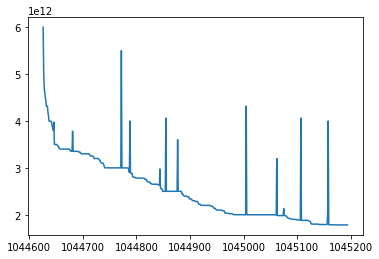

In [193]:
# are these jumps smart contracts?
block_transactions['gas_price'].plot()

In [ ]:
# not contract creation & transaction_type = 2
grouper = block_transactions.groupby(['is_con'])
grouper.mean()

### Transactions

In [288]:
(merged_with_receipts['gas_used'] == 21000).mean()

0.3730499614726587

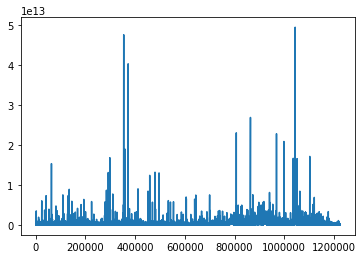

In [283]:
merged_with_receipts['effective_gas_price'].plot()

In [279]:
merged_with_receipts['gas_used'].head() * merged_with_receipts['gas_price'].head()

0    12330581659226772
1     5756117305332513
2     3431897700000000
3     2922413516211000
4     2898000000000000
dtype: int64

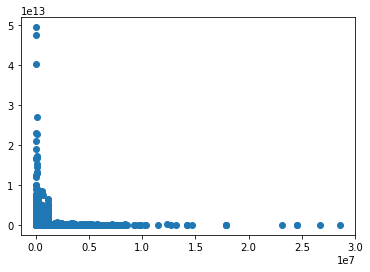

In [278]:
plt.scatter(
    merged_with_receipts['gas_used'],
    merged_with_receipts['gas_price']
)

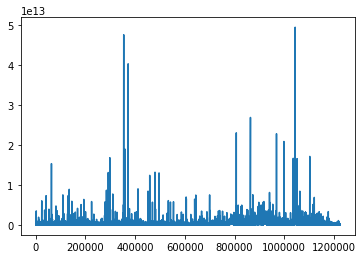

In [277]:
merged_with_receipts['gas_used'].plot()

In [276]:
merged_with_receipts['gas_used']#.min()

0           59442
1           29729
2           21000
3           21000
4           21000
            ...  
1225099    481359
1225100     97751
1225101     77257
1225102     69273
1225103    154360
Name: gas_used, Length: 1225104, dtype: int64

In [268]:
merged_with_receipts.columns

Index(['hash', 'nonce', 'block_hash', 'block_number', 'transaction_index',
       'from_address', 'to_address', 'value', 'gas', 'gas_price', 'input',
       'block_timestamp', 'max_fee_per_gas', 'max_priority_fee_per_gas',
       'transaction_type', 'transaction_hash', 'cumulative_gas_used',
       'gas_used', 'contract_address', 'root', 'status', 'effective_gas_price',
       'is_transfer'],
      dtype='object')

In [56]:
data = merged_with_receipts[
    (~merged_with_receipts['max_priority_fee_per_gas'].isna()) *
    (merged_with_receipts['contract_address'].isna()) * 
    (~merged_with_receipts['is_transfer'])
]

/Users/tracy/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [59]:
data['status'].mean()

0.9260406476131526

In [99]:
data = pd.merge(
    data,
    blocks[['number', 'datetime', 'hour']],
    how='left',
    left_on='block_number',
    right_on='number'
)

In [ ]:
data.groupby(['status', 'hour']).mean()['effective_gas_price'].unstack('status').plot.bar(
    title="status by hour of day"
);

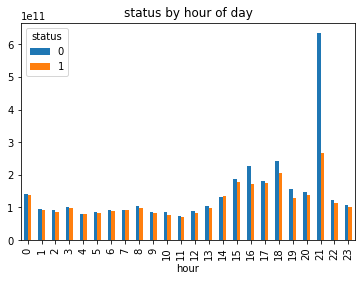

In [107]:
data.groupby(['status', 'hour']).mean()['effective_gas_price'].unstack('status').plot.bar(
    title="status by hour of day"
);

In [293]:
eth_blocks

NameError: name 'eth_blocks' is not defined

In [295]:
# data.groupby(['status', 'hour']).mean()['base_fee_per_gas'].unstack('status').plot.bar(
#     title="status by hour of day"
# );

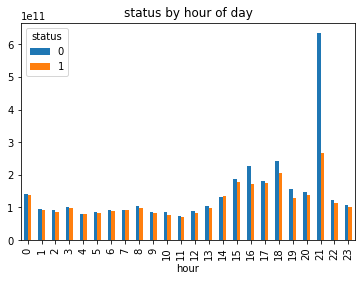

In [296]:
data.groupby(['status', 'hour']).mean()['effective_gas_price'].unstack('status').plot.bar(
    title="status by hour of day"
);

In [ ]:
# what happens in hour 21?

### Blocks

In [82]:
blocks = eth_data.blocks

In [92]:
blocks['datetime'] = pd.to_datetime(eth_data.blocks['timestamp'], unit='s')
blocks['hour'] = blocks['datetime'].dt.hour

In [138]:
eth_data.blocks.columns

Index(['number', 'hash', 'parent_hash', 'nonce', 'sha3_uncles', 'logs_bloom',
       'transactions_root', 'state_root', 'receipts_root', 'miner',
       'difficulty', 'total_difficulty', 'size', 'extra_data', 'gas_limit',
       'gas_used', 'timestamp', 'transaction_count', 'base_fee_per_gas',
       'datetime', 'hour'],
      dtype='object')

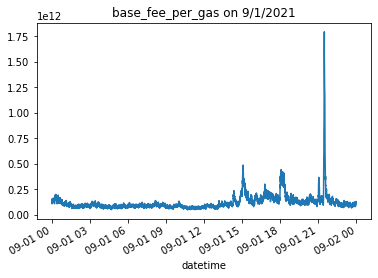

In [252]:
eth_data.blocks.set_index('datetime').sort_index()['base_fee_per_gas'].plot(
    title='base_fee_per_gas on 9/1/2021'
)

In [143]:
blocks = eth_data.blocks.set_index('datetime').sort_index()

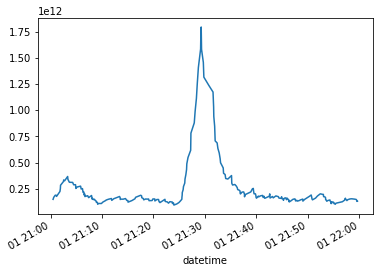

In [150]:
blocks[blocks['hour'] == 21]['base_fee_per_gas'].plot()

In [ ]:
feat

In [261]:
block_means = eth_data.transactions[['gas_price', 'block_number']].groupby('block_number').mean()

In [264]:
block_means.loc[13142179]

gas_price    3.016040e+12
Name: 13142179, dtype: float64

In [265]:
block_means.mean()

gas_price    1.500335e+11
dtype: float64

In [159]:
peak = '2021-09-01 21:29:19' #913142179

In [164]:
eth_data.blocks.query('number==13142179')

,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,...,total_difficulty,size,extra_data,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas,datetime,hour
5452,13142179,0xfc739ccd1ae536897d7bc08ddd093230d89ce0503319...,0x04c30e47689e808e1fef3a37d8815fb92ae99248450c...,0x3078561b859b9860,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000080000000000020000000404000000000024...,0x00ef1f59fa7f3ae9ae63a86a16c4ffdc33f3b75f0e71...,0x9e5b7caa2303d7f128d9c214ec3103ce64b560a38e81...,0x5a16efe55afbeed8fa28b12b0b77837102d479018e79...,0xb7e390864a90b7b923c9f9310c6f98aafe43f707,...,29900958230701324738032,3082,0xd883010a08846765746888676f312e31362e35856c69...,29970705,733638,1630531759,18,1794569008707,2021-09-01 21:29:19,21


In [266]:
blocks['2021-09-01 21:25:00': '2021-09-01 21:31:00']#['base_fee_per_gas']#.plot()

,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas,hour
datetime,,,,,,,,,,,,,,,,,,,,
2021-09-01 21:25:16,13142156,0x447c49b20851acd79803760fb4d843ef963bd749c503...,0x1952fb8282803bb26e7cbf42626f5f6c6ad283d8b647...,0x632240a3d16f0e76,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x0624760e04252853d86c840764312440058041803813...,0xe5bc4e0b18e3ae0b9a16a322bcb2567440867194f563...,0x3f0774314618201f2f9db5027c88b8b927c049fe9582...,0x69c6abe95d586304a11b630495d0a2f3cbfaa01ce2b0...,0x4f9bebe3adc3c7f647c0023c60f91ac9dffa52d5,8128045036211519,29900770891350410063078,5247,0x4554482e4352415a59504f4f4c2e4f5247,30029295,30009067,1630531516,31,133750009836,21
2021-09-01 21:25:33,13142157,0xf4bf3542eae9c059186370f6ff6981314942d85b23f2...,0x447c49b20851acd79803760fb4d843ef963bd749c503...,0x8f446adf10f02012,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x0401e72a1843dc6e46db38108c6c004301936c62c464...,0xa13950dc7aa64c3775743989efb87cf646a0be7e6725...,0x51224f68b37fe930357446ee24462a6680b3709cb0e6...,0x73f98689c40f2a1c69fef2b330885f3743c85ac2653b...,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,8128049331178815,29900779019399741241893,5569,0xd883010a08846765746888676f312e31362e37856c69...,30000000,29986850,1630531533,34,150446238379,21
2021-09-01 21:25:34,13142158,0x71b3c01cfab5252a1c9a652a51e5b18d75b8acc1b1a6...,0xf4bf3542eae9c059186370f6ff6981314942d85b23f2...,0x8a2b4ecf2b912c0d,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x8025289d4d03de2408b012900690940223c03b0332f4...,0xd88be6b6ef209914382116fd13dad67a824e519f0025...,0x4ec72e97fdd16db91a13ec86cca596abbad9b7e322be...,0xf2f86285662a6e0645662429af5a34889eef7b84a862...,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,8132022400233600,29900787151422141475493,6175,0xd883010a08846765746888676f312e31362e37856c69...,30000000,29988907,1630531534,38,169235531776,21
2021-09-01 21:25:37,13142159,0x32e96895fd2690b5f357a46f9d96a1ae618673cbde82...,0x71b3c01cfab5252a1c9a652a51e5b18d75b8acc1b1a6...,0x6a082a09e7331066,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x007902992610442470101021500500e8c50832908030...,0xf7abf2900800b87dd0d275382b718fe975bea58a070a...,0xa8523e91ac8c7fd53eb33bc619575c870ffd2046b1ce...,0x97055f4f55c115405679d98ac089255f01b9f6322b44...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,8135997409263510,29900795287419550739003,11411,0x65746865726d696e652d6575726f70652d7765737433,30000000,29987117,1630531537,83,190374328833,21
2021-09-01 21:25:38,13142160,0xfe81657adf618955d1403eaaa4e94ab4f338c19cbaa3...,0x32e96895fd2690b5f357a46f9d96a1ae618673cbde82...,0x7df3bb0840dc07e8,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x5490601280a0510b11cf420500a321404f7401072483...,0x9046eafceb224b3e69468cccdc4d0bb23fdc841bbc51...,0x7ecc9c1d6c92c3e868dd011348d74c99cbb969d706e8...,0x472c1ce9289cce04cba8ea245143dcb61b4c5109fe4b...,0xb3b7874f13387d44a3398d298b075b7a3505d8d4,8139974359215797,29900803427393909954800,7052,0x426162656c20687a38,30000000,29996991,1630531538,45,214150681666,21
2021-09-01 21:25:48,13142161,0xdf26020b27326ccf7cced19363ea26a30620fbebc638...,0xfe81657adf618955d1403eaaa4e94ab4f338c19cbaa3...,0x4711125d53ffa798,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x4c0a28011221ae4000402911002aaa23a2a2485a0d80...,0xcec8c9bac4ae1be66b11b0846b9d5e4d515f204db35b...,0x28a0c5751f4db30e68c8700f065d02f02f0f562ea584...,0x17dfbf424fe33d4c5d486c45381eeb0b4c8f39bcd304...,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,8139978654183093,29900811567372564137893,10204,0xd883010a08846765746888676f312e31362e37856c69...,30000000,29979920,1630531548,47,240914147045,21
2021-09-01 21:25:52,13142162,0x91b975c448c2998afddc7f33daabf6f1c48d975c5e7e...,0xdf26020b27326ccf7cced19363ea26a30620fbebc638...,0x36e15754576f55d0,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xcf080054604825c5025341c9920a274d9e1411200949...,0x904f9d9710d50622ff0427713103769264a269

In [ ]:
# theory - there is an NFT drop or a lot of contract activity at that time

In [130]:
eth_data.blocks

,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,...,total_difficulty,size,extra_data,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas,datetime,hour
0,13136827,0x71fecf94580b6bdc8184f6799a0506d80d4c0f2df75e...,0xce7b455e4606c9937d6e30fd6f2056415cd1db8159c7...,0xfada00315b2acf50,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x10205000008000008200000080001000004000000008...,0x61649b7975e2d8c48bee823d95a2bf7fb62b5cf0530e...,0xa6708f038fcb5fa09a1bf2daaf361897d541e98c6d59...,0x718494fc38b5ab8dc3b59b8125ba647efde2f7359fbb...,0x1ad91ee08f21be3de0ba2ba6918e714da6b45836,...,29856415949626737747807,9146,0x486976656f6e2075732d6865617679206752476e,30000000,1823420,1630459818,37,103982045792,2021-09-01 01:30:18,1
1,13136828,0x1524dec17ef49f415cf3aef91a7cd1b9c3d2a666b378...,0x71fecf94580b6bdc8184f6799a0506d80d4c0f2df75e...,0xc60548b2daf9e115,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x062005b2185204238e985e4c90621a165288e36bac2d...,0xc4ee29db70f290aea86c19ddb47c111d23f4deac6177...,0xd8cbb88b42bd6ea03fea267277b4472e74c592a2b7fe...,0x51950a58bc5d4b1cd5a7c18531d67fa36dd7668008e0...,0x1ad91ee08f21be3de0ba2ba6918e714da6b45836,...,29856424335727830834048,51582,0x486976656f6e2072752d68656176792d32205545636b,30000000,9916375,1630459823,163,92564314585,2021-09-01 01:30:23,1
2,13136829,0x8626b9f635910cf8b4a1b6a2567fee4a4b0aa30d8e3b...,0x1524dec17ef49f415cf3aef91a7cd1b9c3d2a666b378...,0x7b4f0230fabdd5e2,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x5b6167f611830e659eb6e6d6cbeb1377f19fb47e8d71...,0x0620e0c347c6cceaed1435f0a85a95e07f33cd1de233...,0xe27a1a023bccbe0e25a5db8cf5c67489344084f9780b...,0x6d217395467b6051beb2c9eebf37b5c8a0e547c14fbf...,0x99c85bb64564d9ef9a99621301f22c9993cb89e3,...,29856432717738442963227,191522,0x626565706f6f6c2e6f72675f3600dc,30029295,30027410,1630459849,365,88642962388,2021-09-01 01:30:49,1
3,13136830,0x54f8b2ff071ae26f2f2378b10342c9808ab5d4856cc0...,0x8626b9f635910cf8b4a1b6a2567fee4a4b0aa30d8e3b...,0xef0304be9234d448,0x1818ae7a3c41d975b75ab24ff062320b7e364abc2edf...,0x1021210adbe1526770a4a16ab331e001c7239c268c1e...,0x85d7724309935219ccbdfe020910c79f6aa3a00c2c58...,0x12c2d47e3a18d492fc61fdf2d3447982d9d5658ccbab...,0x6db55497811e47ea4269f1d02af20e11215c75433dd7...,0x00192fb10df37c9fb26829eb2cc623cd1bf599e8,...,29856441099753350059702,75696,0x457468657265756d50504c4e532f326d696e6572735f...,30000000,14760831,1630459858,121,99721942349,2021-09-01 01:30:58,1
4,13136831,0xd424d29dfaf400377be554adbc5254b12ce94e192c09...,0x54f8b2ff071ae26f2f2378b10342c9808ab5d4856cc0...,0x8dea8fa1a802c647,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x15a0c0726d0019999085ab60a2320f0912021a004a41...,0x62a01c65c2206282d10d14b4a6acc7c775c3e9668cfd...,0xdd3445c528cbf062b9c449018883a2dd1143cf58741a...,0x8c640d527d3eac280ec2a2ec74979557b5c08f445223...,0xe206e3dca498258f1b7eec1c640b5aee7bb88fd0,...,29856449489958113556183,71934,0xd883010a08846765746888676f312e31362e37856c69...,30000000,13709421,1630459861,136,99523189039,2021-09-01 01:31:01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6450,13142522,0x7da93020043328ff546d125c6ce2dc43331f122e8d46...,0x31d550609039cb035671526421f8a8e71c3630dd8834...,0xad6d2b05ff4b0e8e,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x182c409221261393d08c30c2b0234e0d348250c51e8c...,0x3f62bd4a325ad6cdb4ddfe00e57f9d131d6931de9afa...,0xd2dbcc3a01966799aad514abaac0b3791cbb48572f99...,0x4a40f0d02156cd6945b5cc450b3558ea9395d8c094fe...,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,...,29903757659963151994578,57465,0xd883010a08846765746888676f312e31362e37856c69...,29999972,11533592,1630536229,108,103853569452,2021-09-01 22:43:49,22
6451,13142523,0x2ce0bba1430ed4d259c3b1410d31ee3385a3a58d137d...,0x7da93020043328ff546d125c6ce2dc43331f122e8d46...,0xc4a2de17d37d358e,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01

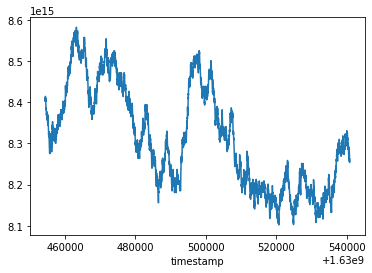

In [73]:
eth_data.blocks.set_index('timestamp').sort_index()['difficulty'].plot()

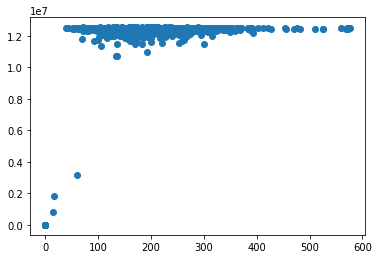

In [30]:
plt.scatter(
    eth_data.blocks['transaction_count'], 
    eth_data.blocks['gas_used']
)

0       203
1       198
2       156
3       163
4       304
       ... 
6471    137
6472    212
6473    201
6474    162
6475    233
Name: transaction_count, Length: 6476, dtype: int64